In [1]:
#Import the libraries and packages we need
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import highlight_text

In [2]:
df = pd.read_csv('1995_96 - 2020 Premier league standings.csv')

In [3]:
df

,Rk,Squad,MP,W,D,L,GF,GA,Pts,Attendance,Top Team Scorer,Goalkeeper,Year
0,1,Manchester Utd,38,25,7,6,73,35,82,41001,Eric Cantona - 14,Peter Schmeichel,1996
1,2,Newcastle Utd,38,24,6,8,66,37,78,36501,Les Ferdinand - 25,Shaka Hislop,1996
2,3,Liverpool,38,20,11,7,70,34,71,39553,Robbie Fowler - 28,David James,1996
3,4,Aston Villa,38,18,9,11,52,35,63,37492,Dwight Yorke - 17,Mark Bosnich,1996
4,5,Arsenal,38,17,12,9,49,32,63,32614,Ian Wright - 15,David Seaman,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,16,West Ham,38,10,9,19,49,62,39,44155,Michail Antonio - 10,Łukasz Fabiański,2020
496,17,Aston Villa,38,9,8,21,41,67,35,28505,Jack Grealish - 8,Tom Heaton,2020
497,18,Bournemouth,38,9,7,22,40,65,34,7745,Callum Wilson - 8,Aaron Ramsdale,2020
498,19,Watford,38,8,10,20,36,64,34,15353,Troy Deeney - 10,Ben Foster,2020


In [4]:
df=df.fillna(0)

In [5]:
df['GD'] = df['GF'] - df['GA']

In [6]:
df.head(10)

,Rk,Squad,MP,W,D,L,GF,GA,Pts,Attendance,Top Team Scorer,Goalkeeper,Year,GD
0,1,Manchester Utd,38,25,7,6,73,35,82,41001,Eric Cantona - 14,Peter Schmeichel,1996,38
1,2,Newcastle Utd,38,24,6,8,66,37,78,36501,Les Ferdinand - 25,Shaka Hislop,1996,29
2,3,Liverpool,38,20,11,7,70,34,71,39553,Robbie Fowler - 28,David James,1996,36
3,4,Aston Villa,38,18,9,11,52,35,63,37492,Dwight Yorke - 17,Mark Bosnich,1996,17
4,5,Arsenal,38,17,12,9,49,32,63,32614,Ian Wright - 15,David Seaman,1996,17
5,6,Everton,38,17,10,11,64,44,61,27714,Andrei Kanchelskis - 16,Neville Southall,1996,20
6,7,Blackburn,38,18,7,13,61,47,61,25163,Alan Shearer - 31,Tim Flowers,1996,14
7,8,Tottenham,38,16,13,9,50,38,61,30548,Teddy Sheringham - 16,Ian Walker,1996,12
8,9,Nott'ham Forest,38,15,13,10,50,54,58,25953,Ian Woan Jason Lee... - 8,Mark Crossley,1996,-4
9,10,West Ham,38,14,9,15,43,52,51,22335,Tony Cottee Julian Dicks - 10,Luděk Mikloško,1996,-9


In [7]:
df.GD

0      38
1      29
2      36
3      17
4      17
       ..
495   -13
496   -26
497   -25
498   -28
499   -49
Name: GD, Length: 500, dtype: int64

In [8]:
y=df.Rk
x=df.GD.values.reshape(-1,1)

In [9]:
y

0       1
1       2
2       3
3       4
4       5
       ..
495    16
496    17
497    18
498    19
499    20
Name: Rk, Length: 500, dtype: int64

In [10]:
x

array([[ 38],
       [ 29],
       [ 36],
       [ 17],
       [ 17],
       [ 20],
       [ 14],
       [ 12],
       [ -4],
       [ -9],
       [  2],
       [-15],
       [-17],
       [-15],
       [-13],
       [-18],
       [-18],
       [-25],
       [-19],
       [-32],
       [ 32],
       [ 33],
       [ 30],
       [ 25],
       [ 13],
       [  3],
       [ -1],
       [  3],
       [ -8],
       [ -7],
       [-10],
       [-13],
       [ -1],
       [ -9],
       [-13],
       [ -6],
       [-16],
       [-18],
       [ -9],
       [-28],
       [ 35],
       [ 47],
       [ 26],
       [ 28],
       [ 11],
       [  5],
       [  1],
       [ -1],
       [  3],
       [ 10],
       [  2],
       [ -5],
       [ -9],
       [-12],
       [-12],
       [-15],
       [-15],
       [-20],
       [-45],
       [-34],
       [ 43],
       [ 42],
       [ 27],
       [ 28],
       [ -7],
       [  5],
       [ 19],
       [ -5],
       [ -6],
       [ -6],
       [ -3],
      

In [11]:
x.shape

(500, 1)

In [12]:
y.shape

(500,)

In [13]:
model = LinearRegression().fit(x,y)

In [14]:
r_sq = model.score(x,y)
intercept = model.intercept_
slope = model.coef_

In [15]:
y_pred = intercept + slope*x

Text(-65, 3, 'The model fits the data very well.\nInterestingly enough, the spread of all the data points\nfor each rank is fairly small.')

findfont: Font family ['Andale Mono'] not found. Falling back to DejaVu Sans.


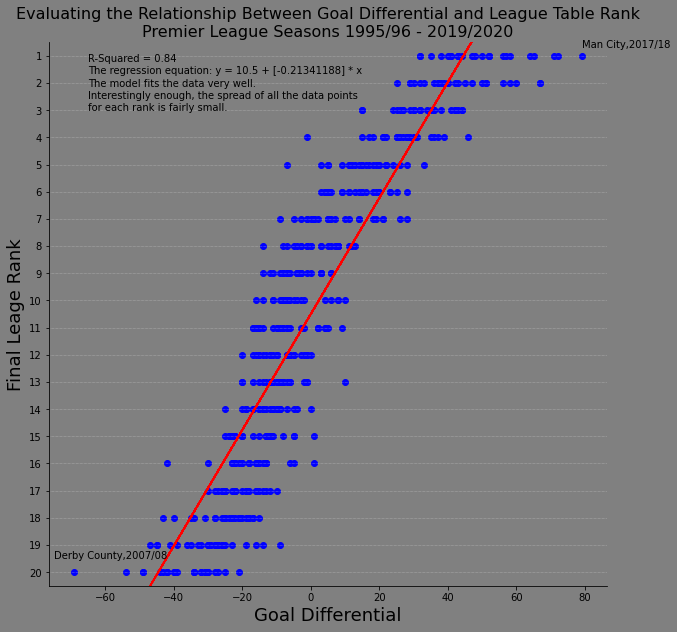

In [16]:
fig,ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('grey')
ax.patch.set_facecolor('grey')

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y')
spines = ['top','right']
for i in spines:
    if i in spines:
        ax.spines[i].set_visible(False)

#plot data
plt.scatter(x,y,c='blue')
plt.plot(x,y_pred,c='red')

plt.ylim(.5,20.5)
plt.gca().invert_yaxis()

plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

plt.xlabel('Goal Differential',fontsize=18)
plt.ylabel('Final Leage Rank',fontsize=18)
plt.title('Evaluating the Relationship Between Goal Differential and League Table Rank\nPremier League Seasons 1995/96 - 2019/2020',ha='center',fontsize=16,fontname='Andale Mono')

#annotate teams
ax.annotate(xy=(79,.7),text='Man City,2017/18')
ax.annotate(xy=(-75,19.5),text='Derby County,2007/08')


#analysis
ax.annotate(xy=(-65,1.65),text=f'R-Squared = {round(r_sq,2)}\nThe regression equation: y = {intercept} + {slope} * x ')
ax.annotate(xy=(-65,3),text=f'The model fits the data very well.\nInterestingly enough, the spread of all the data points\nfor each rank is fairly small.')


In [17]:
df.sort_values(by='Rk',ascending=True).head(30)

,Rk,Squad,MP,W,D,L,GF,GA,Pts,Attendance,Top Team Scorer,Goalkeeper,Year,GD
0,1,Manchester Utd,38,25,7,6,73,35,82,41001,Eric Cantona - 14,Peter Schmeichel,1996,38
440,1,Manchester City,38,32,4,2,106,27,100,54070,Sergio Agüero - 21,Ederson,2018,79
60,1,Manchester Utd,38,22,13,3,80,37,79,55188,Dwight Yorke - 18,Peter Schmeichel,1999,43
420,1,Chelsea,38,30,3,5,85,33,93,41508,Diego Costa - 20,Thibaut Courtois,2017,52
80,1,Manchester Utd,38,28,7,3,97,45,91,55107,Dwight Yorke - 20,Mark Bosnich,2000,52
400,1,Leicester City,38,23,12,3,68,36,81,31998,Jamie Vardy - 24,Kasper Schmeichel,2016,32
100,1,Manchester Utd,38,24,8,6,79,31,80,67489,Teddy Sheringham - 15,Fabien Barthez,2001,48
380,1,Chelsea,38,26,9,3,73,32,87,41546,Diego Costa - 20,Thibaut Courtois,2015,41
120,1,Arsenal,38,26,9,3,79,36,87,38055,Thierry Henry - 24,David Seaman,2002,43
360,1,Manchester City,38,27,5,6,102,37,86,47075,Yaya Touré - 20,Joe Hart,2014,65
